In [2]:
import pandas as pd            # Data manipulation
import numpy as np             # Numerical operations
import matplotlib.pyplot as plt # Visualization
from sklearn.datasets import fetch_california_housing  # Fetching dataset
from sklearn.preprocessing import MinMaxScaler         # Normalizing data


In [3]:
# Load the California housing dataset
data = fetch_california_housing()

# Convert it into a Pandas DataFrame
df = pd.DataFrame(data['data'], columns=data['feature_names'])

# Add the target column (housing price)
df['Target'] = data['target']

# Display the first few rows to verify the data
print(df.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [4]:
print(df.describe())


             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        Target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

In [5]:
print(df.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [7]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


In [8]:
print(df.isnull().sum())


MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64


In [9]:
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Display the first few rows of scaled data
print(df_scaled.head())


     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  0.539668  0.784314  0.043512   0.020469    0.008941  0.001499  0.567481   
1  0.538027  0.392157  0.038224   0.018929    0.067210  0.001141  0.565356   
2  0.466028  1.000000  0.052756   0.021940    0.013818  0.001698  0.564293   
3  0.354699  1.000000  0.035241   0.021929    0.015555  0.001493  0.564293   
4  0.230776  1.000000  0.038534   0.022166    0.015752  0.001198  0.564293   

   Longitude    Target  
0   0.211155  0.902266  
1   0.212151  0.708247  
2   0.210159  0.695051  
3   0.209163  0.672783  
4   0.209163  0.674638  


In [10]:
# Create age categories using pd.cut()
df['HouseAgeCategory'] = pd.cut(df['HouseAge'], bins=[0, 10, 30, 100], labels=['New', 'Old', 'Very Old'])

# Apply one-hot encoding to the 'HouseAgeCategory' column
df_encoded = pd.get_dummies(df, columns=['HouseAgeCategory'])

# Display the updated DataFrame
print(df_encoded.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target  HouseAgeCategory_New  HouseAgeCategory_Old  \
0    -122.23   4.526                 False                 False   
1    -122.22   3.585                 False                  True   
2    -122.24   3.521                 False                 False   
3    -122.25   3.413                 False                 False   
4    -122.25   3.422                 False                 False   

   HouseAgeCategory_Very Old  
0                       True  
1                      False  
2                       True  
3         

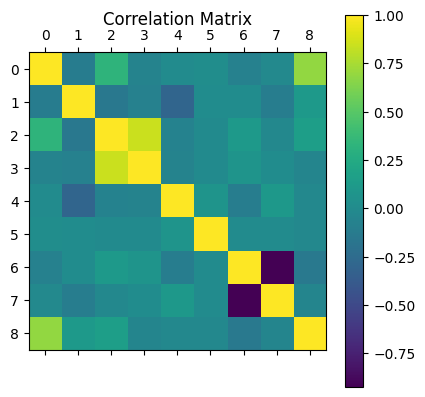

In [12]:
# Select only numerical columns for the correlation matrix
numerical_df = df.select_dtypes(include=[np.number])

# Create the correlation matrix
corr_matrix = numerical_df.corr()

# Visualize the correlation matrix using matplotlib
plt.matshow(corr_matrix)
plt.colorbar()
plt.title('Correlation Matrix', pad=20)
plt.show()



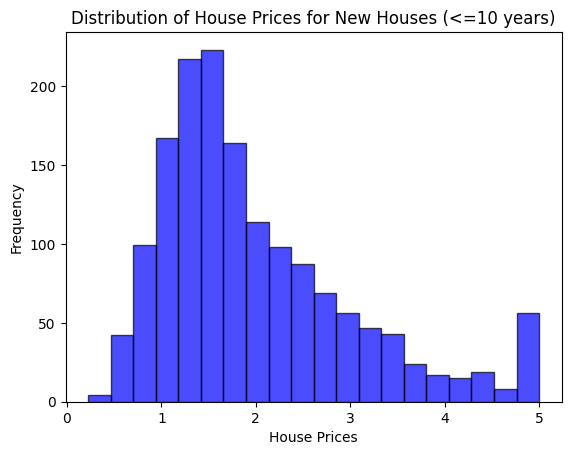

In [34]:

# Filter the DataFrame for new houses
new_houses = df[df['HouseAgeCategory'] == 'New']

# Plot histogram for New Houses
plt.hist(new_houses['Target'], bins=20, alpha=0.7, color='blue', edgecolor='black')
plt.title('Distribution of House Prices for New Houses (<=10 years)')
plt.xlabel('House Prices')
plt.ylabel('Frequency')
plt.show()


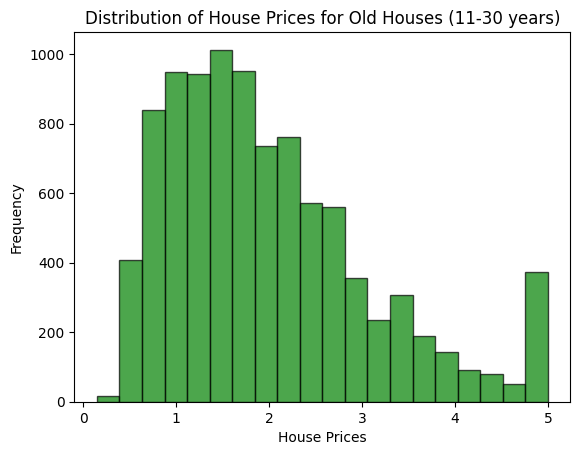

In [40]:
# Filter the DataFrame for old houses
old_houses = df[df['HouseAgeCategory'] == 'Old']

# Plot histogram for Old Houses
plt.hist(old_houses['Target'], bins=20, alpha=0.7, color='green', edgecolor='black')
plt.title('Distribution of House Prices for Old Houses (11-30 years)')
plt.xlabel('House Prices')
plt.ylabel('Frequency')
plt.show()


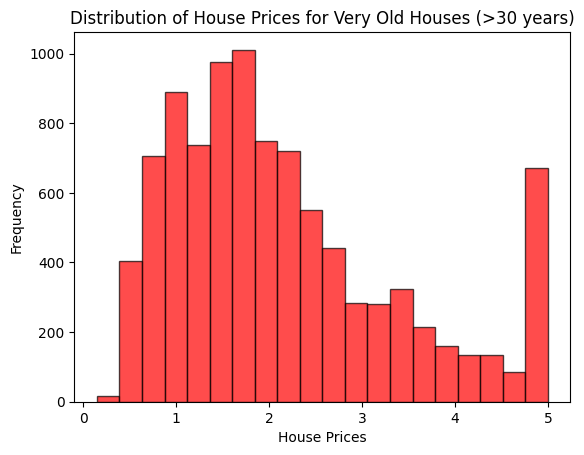

In [45]:
# Filter the DataFrame for very old houses
very_old_houses = df[df['HouseAgeCategory'] == 'Very Old']

# Plot histogram for Very Old Houses
plt.hist(very_old_houses['Target'], bins=20, alpha=0.7, color='red', edgecolor='black')
plt.title('Distribution of House Prices for Very Old Houses (>30 years)')
plt.xlabel('House Prices')
plt.ylabel('Frequency')
plt.show()



In [46]:
# Create income bins
df['IncomeBinned'] = pd.cut(df['MedInc'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# Display the binned income
print(df[['MedInc', 'IncomeBinned']].head())


   MedInc IncomeBinned
0  8.3252       Medium
1  8.3014       Medium
2  7.2574       Medium
3  5.6431          Low
4  3.8462          Low


In [47]:
# Group data by 'IncomeBinned' and calculate the mean of 'Target' (housing price)
income_group = df.groupby('IncomeBinned')['Target'].mean()

# Display the grouped data
print(income_group)


IncomeBinned
Very Low     1.446778
Low          2.336637
Medium       3.775789
High         4.783643
Very High    4.870782
Name: Target, dtype: float64


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15124\1767191938.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_group = df.groupby('IncomeBinned')['Target'].mean()


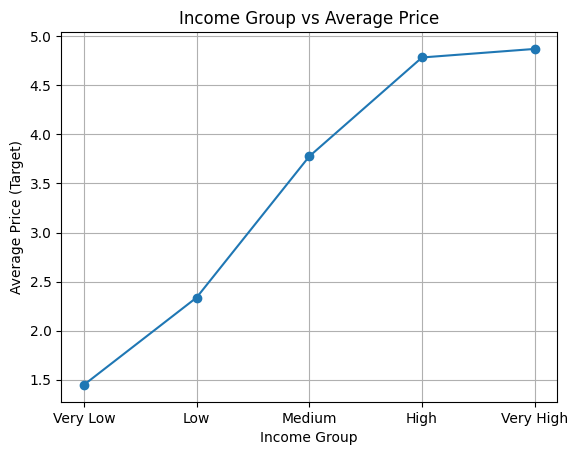

In [48]:
# Plot the income vs. price relationship
plt.plot(income_group.index, income_group.values, marker='o')

# Add labels and title
plt.title('Income Group vs Average Price')
plt.xlabel('Income Group')
plt.ylabel('Average Price (Target)')
plt.grid(True)
plt.show()
